In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# Introduction to Machine Learning
## Live Demos

In [2]:
titanic_data = pd.read_csv("data/titanic.csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# huge entropy --> to be deleted
titanic_data.PassengerId.nunique() == len(titanic_data)

True

In [5]:
titanic_data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [6]:
titanic_data.Age.value_counts(dropna = False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [7]:
titanic_data.Age.isna().sum() / len(titanic_data)

np.float64(0.19865319865319866)

In [8]:
titanic_data = titanic_data.drop(columns = ["PassengerId", "Name", "Ticket"])

In [9]:
# titanic_data = titanic_data.dropna()

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [11]:
titanic_data.Cabin.replace({np.nan: "Unknown"}).value_counts()

Cabin
Unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

In [12]:
titanic_data = titanic_data.drop(columns = "Cabin")

In [13]:
# titanic_data = titanic_data.dropna()

In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
titanic_data.Age = titanic_data.Age.fillna(titanic_data.Age.median())

In [18]:
titanic_data.Embarked.fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [19]:
titanic_data.Embarked.value_counts().index[0]

'S'

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [23]:
titanic_data_preprocessed = pd.get_dummies(titanic_data, columns = ["Sex", "Embarked"], drop_first = True)

In [25]:
titanic_data_preprocessed = titanic_data_preprocessed.astype(float)

In [31]:
# final column - target
# for classification it is called label
target = titanic_data_preprocessed.Survived

In [33]:
attributes = titanic_data_preprocessed.drop(columns = ["Survived"])

In [38]:
# this model is high-biased; C improves it
model = LogisticRegression(C = 1e9)

In [39]:
model.fit(attributes, target)

C:\Users\aneli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0)

In [40]:
model.score(attributes, target)

0.8013468013468014

In [42]:
# model.predict(attributes)

In [43]:
model.fit(attributes[:-20], target[:-20])

C:\Users\aneli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0)

In [45]:
model.score(attributes, target)

0.7934904601571269

In [46]:
# Train with rows excluding the last 20 but test with the last 20
# The second ones give more accuracy
model.score(attributes[-20:], target[-20:])

0.85

In [47]:
model.score(attributes[:-20], target[:-20])

0.7921928817451206

The Big Numbers Law
One sample looks like its distribution when its size tends toward infinity
20 does not converge to infinity.

In [50]:
len(titanic_data) // 2

445

In [52]:
model.fit(attributes[:-445], target[:-445])

C:\Users\aneli\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0)

In [54]:
print(model.score(attributes[:-445], target[:-445])) # data the model knows
print(model.score(attributes[-445:], target[-445:])) # data the model does not know

0.8161434977578476
0.7932584269662921


In [ ]:
# check if the model has learnt some relations in the data

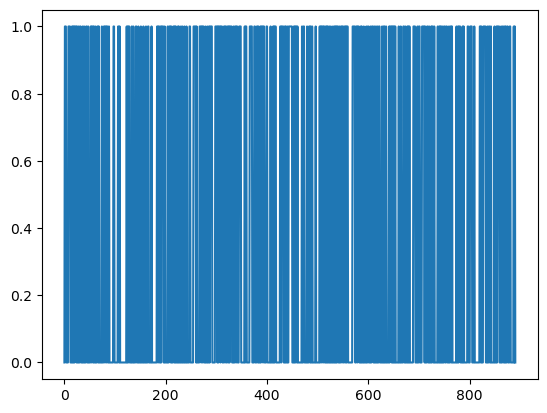

In [60]:
plt.plot(titanic_data.index, titanic_data.Survived)

In [62]:
titanic_data.Survived.value_counts() / len(titanic_data)

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [63]:
model = LogisticRegression(C = 1e9, max_iter = 1000)

In [64]:
model.fit(attributes[:-445], target[:-445])

LogisticRegression(C=1000000000.0, max_iter=1000)

In [65]:
print(model.score(attributes[:-445], target[:-445])) # data the model knows
print(model.score(attributes[-445:], target[-445:])) # data the model does not know

0.8161434977578476
0.7910112359550562


In [66]:
# Variables need to be scaled. Now they are not and that is why, 1000 iterations are not enough.
model.coef_

array([[-9.41960713e-01, -4.15745248e-02, -4.06002598e-01,
         9.66363768e-02,  2.19370607e-04, -2.76175315e+00,
         9.90761815e-01,  2.47764062e-02]])